# image encryption and decryption

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

### Caesar cipher functions

In [3]:

def caesar_encrypt_numbers(plaintext, shift):
    ciphertext = ""
    for char in plaintext:
        if char.isdigit():
            shifted = (int(char) + shift) % 10
            ciphertext += str(shifted)
    return ciphertext

def caesar_decrypt_numbers(ciphertext, shift):
    return caesar_encrypt_numbers(ciphertext, -shift)

### Load image and convert to grayscale

In [4]:
image_path = 'imgs/dina.jpg'  
image = Image.open(image_path).convert('L')  # Convert to grayscale
image_array = np.array(image, dtype=np.uint8)

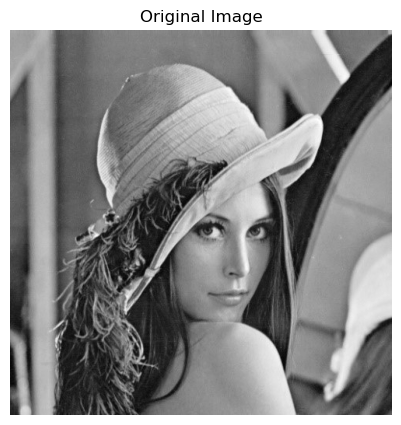

In [5]:
plt.figure(figsize=(5, 5))
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.savefig('imgs/original_image.png')
plt.show()

### Step 1: Confusion - Shuffle pixel positions


In [6]:
np.random.seed(42)  # For reproducibility
rows, cols = image_array.shape
flat_array = image_array.flatten()
shuffled_indices = np.random.permutation(len(flat_array))
confused_array = flat_array[shuffled_indices]
confused_image = confused_array.reshape(rows, cols)

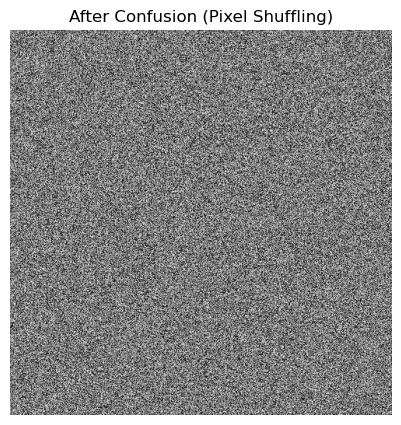

In [7]:
plt.figure(figsize=(5, 5))
plt.imshow(confused_image, cmap='gray')
plt.title('After Confusion (Pixel Shuffling)')
plt.axis('off')
plt.savefig('imgs/confused_image.png')
plt.show()

### Step 2: Diffusion - Apply Caesar cipher to pixel values

In [8]:
shift = 3
diffused_array = np.copy(confused_image).flatten()

# Convert pixel values to strings and apply Caesar cipher to each digit
for i in range(len(diffused_array)):
    pixel_str = str(diffused_array[i]).zfill(3)  # Pad to 3 digits (since pixel values are 0-255)
    encrypted_pixel = caesar_encrypt_numbers(pixel_str, shift)
    # Convert back to integer, handle cases where encrypted_pixel might be shorter
    encrypted_pixel = encrypted_pixel.zfill(3)  # Ensure 3 digits
    diffused_array[i] = int(encrypted_pixel) % 256  # Keep within 0-255 range

diffused_image = diffused_array.reshape(rows, cols)

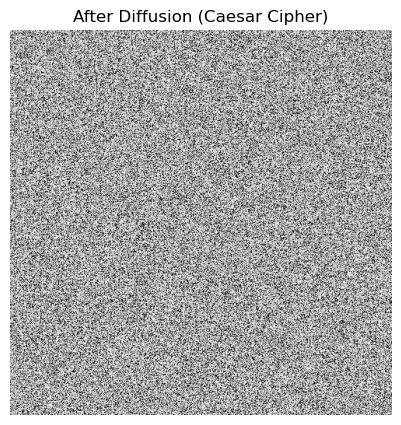

In [9]:
plt.figure(figsize=(5, 5))
plt.imshow(diffused_image, cmap='gray')
plt.title('After Diffusion (Caesar Cipher)')
plt.axis('off')
plt.savefig('imgs/diffused_image.png')
plt.show()

### Decoding: Reverse Diffusion

In [10]:
decoded_diffused_array = np.copy(diffused_image).flatten()
for i in range(len(decoded_diffused_array)):
    pixel_str = str(decoded_diffused_array[i]).zfill(3)
    decrypted_pixel = caesar_decrypt_numbers(pixel_str, shift)
    decrypted_pixel = decrypted_pixel.zfill(3)
    decoded_diffused_array[i] = int(decrypted_pixel) % 256

decoded_diffused_image = decoded_diffused_array.reshape(rows, cols)

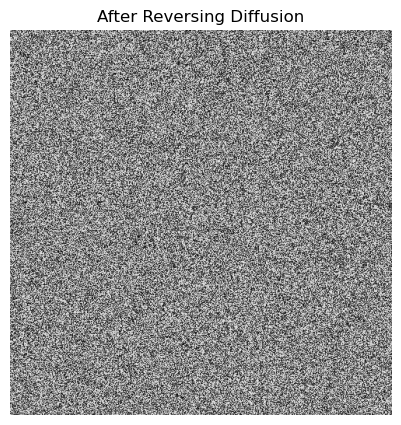

In [11]:
plt.figure(figsize=(5, 5))
plt.imshow(decoded_diffused_image, cmap='gray')
plt.title('After Reversing Diffusion')
plt.axis('off')
plt.savefig('imgs/decoded_diffused_image.png')
plt.show()

### Decoding: Reverse Confusion

In [12]:
inverse_indices = np.argsort(shuffled_indices)
decoded_array = decoded_diffused_array[inverse_indices]
decoded_image = decoded_array.reshape(rows, cols)

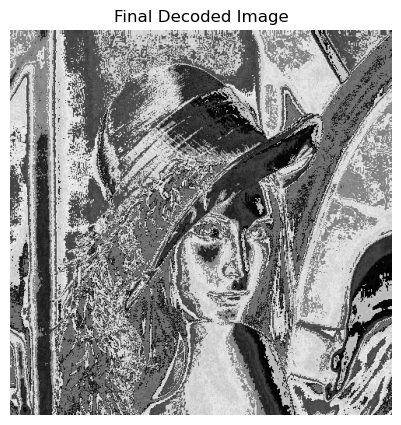

In [13]:
plt.figure(figsize=(5, 5))
plt.imshow(decoded_image, cmap='gray')
plt.title('Final Decoded Image')
plt.axis('off')
plt.savefig('imgs/decoded_image.png')
plt.show()